In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 7.8 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=7058999c5e840ab123d4cc9a29a5be7b509415f957f7c76a07a8646ae38dab53
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'KKEBFPTOUAJOYLQTK13VSWMXIPHLIPE5533ABSXW1DKRWKPL' # your Foursquare ID
CLIENT_SECRET = 'O1HWPWU4DKXYGGDRYD3VYSPGJG001GK2NHYFMINIR4ULZRN2' # your Foursquare Secret
ACCESS_TOKEN = 'FZSAXO5LC2CJWGSYH4VJOH52RLF4QX3NRQJQRINW52KZQE5' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KKEBFPTOUAJOYLQTK13VSWMXIPHLIPE5533ABSXW1DKRWKPL
CLIENT_SECRET:O1HWPWU4DKXYGGDRYD3VYSPGJG001GK2NHYFMINIR4ULZRN2


In [3]:
address = 'Corbett Ave, San Francisco, CA 94114'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.761474 -122.443478


In [4]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="sf_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [6]:

body = client_2a0232d2c9cf40cda2ae17b16fcd4d3c.get_object(Bucket='courseracapstone-donotdelete-pr-7gv01us5gflbtk',Key='Police_Department_Incident_Reports__2018_to_Present.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


NameError: name 'client_2a0232d2c9cf40cda2ae17b16fcd4d3c' is not defined

In [7]:
# The code was removed by Watson Studio for sharing.

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/08/15 12:43:00 PM,2020/08/15,12:43,2020,Saturday,2020/08/15 12:58:00 PM,95308704134,953087,200490354,202281583.0,...,58.0,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0
1,2018/01/18 07:00:00 PM,2018/01/18,19:00,2018,Thursday,2018/01/22 04:59:00 PM,64999771000,649997,186068683,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/08/16 03:13:00 AM,2020/08/16,03:13,2020,Sunday,2020/08/16 03:14:00 AM,95319604083,953196,200491669,202290313.0,...,54.0,2.0,9.0,26.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2020/08/16 03:38:00 AM,2020/08/16,03:38,2020,Sunday,2020/08/16 04:56:00 AM,95326228100,953262,200491738,202290404.0,...,53.0,3.0,2.0,20.0,3.0,NaN,NaN,NaN,NaN,2.0
4,2020/08/15 09:40:00 AM,2020/08/15,09:40,2020,Saturday,2020/08/15 06:21:00 PM,95322706244,953227,206121692,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
San_francisco_dataset = df_data_1

In [15]:

crime_neighbourhood = pd.DataFrame(San_francisco_dataset['Police District'].value_counts().reset_index().values, columns=["Police District", "Count"])
crime_neighbourhood_consolidated = crime_neighbourhood.sort_index(axis = 0, ascending=True)
#crime_neighbourhood_consolidated['Count'].sum()
crime_neighbourhood_consolidated['Police District'] = crime_neighbourhood_consolidated['Police District'].str.upper()
crime_neighbourhood_consolidated

,Police District,Count
0,CENTRAL,61466
1,NORTHERN,55900
2,MISSION,54079
3,SOUTHERN,50858
4,TENDERLOIN,39955
5,BAYVIEW,35022
6,INGLESIDE,30747
7,TARAVAL,28351
8,RICHMOND,25056
9,PARK,19884


<Figure size 14400x7200 with 0 Axes>

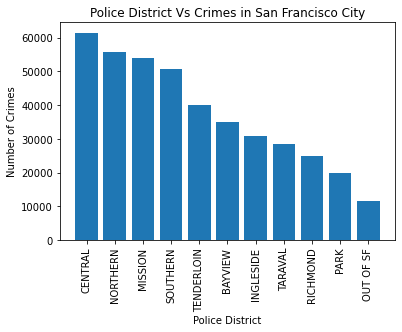

<Figure size 14400x7200 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.bar(crime_neighbourhood_consolidated['Police District'], crime_neighbourhood_consolidated['Count'])
plt.xlabel('Police District')
plt.ylabel('Number of Crimes')
plt.title('Police District Vs Crimes in San Francisco City')
plt.xticks(rotation='vertical')
plt.figure(figsize=(200,100))

In [19]:
San_francisco_dataset.dropna()
Neighbourhoods_df = pd.DataFrame({'Police District':San_francisco_dataset['Police District'], 'Latitude':San_francisco_dataset['Latitude'], 'Longitude':San_francisco_dataset['Longitude']})
Neighbourhoods_df['Police District'] = Neighbourhoods_df['Police District'].str.upper()
Neighbourhoods_df[['Police District', 'Latitude', 'Longitude']].head()


,Police District,Latitude,Longitude
0,INGLESIDE,37.716039,-122.440255
1,OUT OF SF,NaN,NaN
2,BAYVIEW,37.754827,-122.397729
3,MISSION,37.766540,-122.422044
4,PARK,NaN,NaN
